<a href="https://colab.research.google.com/github/hogrider321/ExploratoryDataAnalysisMPG/blob/master/LorenzoMPG_EDA_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Template created by Mehar Chhatwal**

In [ ]:
#Starter Code
library(ggplot2)
library(corrplot) # not available on Google Colab

#**MPG Exploratory Data Analysis**
Lorenzo Martinelli
---


# **Goals:** 
> The goals for the EDA of the MPG dataset are as follows:

1.   **Better understand the MPG dataset**
2.   **Understand the relationships and correlations between the features of the MPG dataset**
3. **How does engine displacement and class affect the fuel efficiency of cars**













# **Purpose of the MPG Dataset**
> The MPG datset contains the fuel economy and specifications of 38 of the most popular vehicles from the years 1999 to 2008.


# **Libraries**
> This EDA uses the ggplot2 and corrplot packages. Exploration was conducted in R using RStudio

> Subset of public data available on http://fueleconomy.gov/


**This dataset contains 234 observations of 11 variables:**
1. Manufacturer
2. Model
3. Displ (engine displacement, in liters)
4. Year (of manufacture)
5. Cyl (number of cylinders)
6. Trans (type of transmission)
7. Drv (the type of drive train, where f = front-wheel drive, r = rear wheel drive, 4 = 4wd)
8. Cty (city miles per gallon)
9. Hwy (highway miles per gallon)
10. Fl (fuel type)
11. Class (type of car)


In [ ]:
summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

# **Overview of Significant Variables via distribution plots**

# Manufacturer


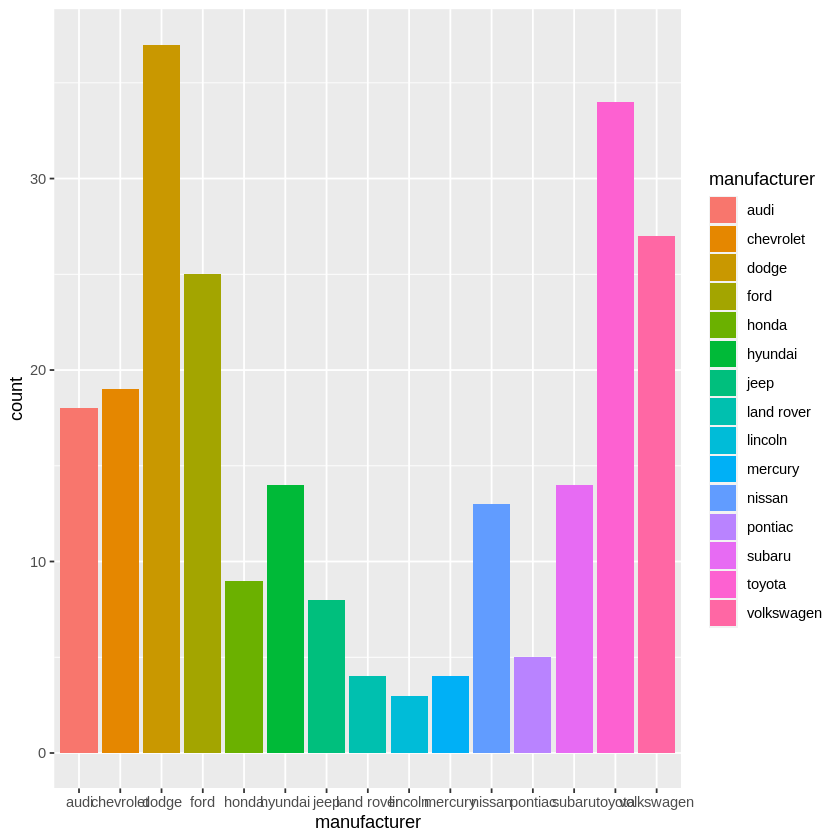

In [ ]:
ggplot(mpg, aes(manufacturer, fill=manufacturer))+ geom_bar()

**Analysis** 
> A brief analysis of the plot reveals that the top 3 manufacturers featured in the mpg datasets are:

1. Dodge
2. Toyota
3. Volkswagen

> The 3 least represented manufacturers are:

1. Land Rover/Mercury
3. Lincoln

> Due to the dataset representing 38 popular automobiles, it can be reasonably assumed that Dodge was the most popular manufacturer from the years 1999-2008 while Land Rover and Mercury were relatively less popular.

Validation Table for Manufacturer Variable:


In [ ]:
table(mpg$manufacturer)


      audi  chevrolet      dodge       ford      honda    hyundai       jeep 
        18         19         37         25          9         14          8 
land rover    lincoln    mercury     nissan    pontiac     subaru     toyota 
         4          3          4         13          5         14         34 
volkswagen 
        27 

# Displ

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



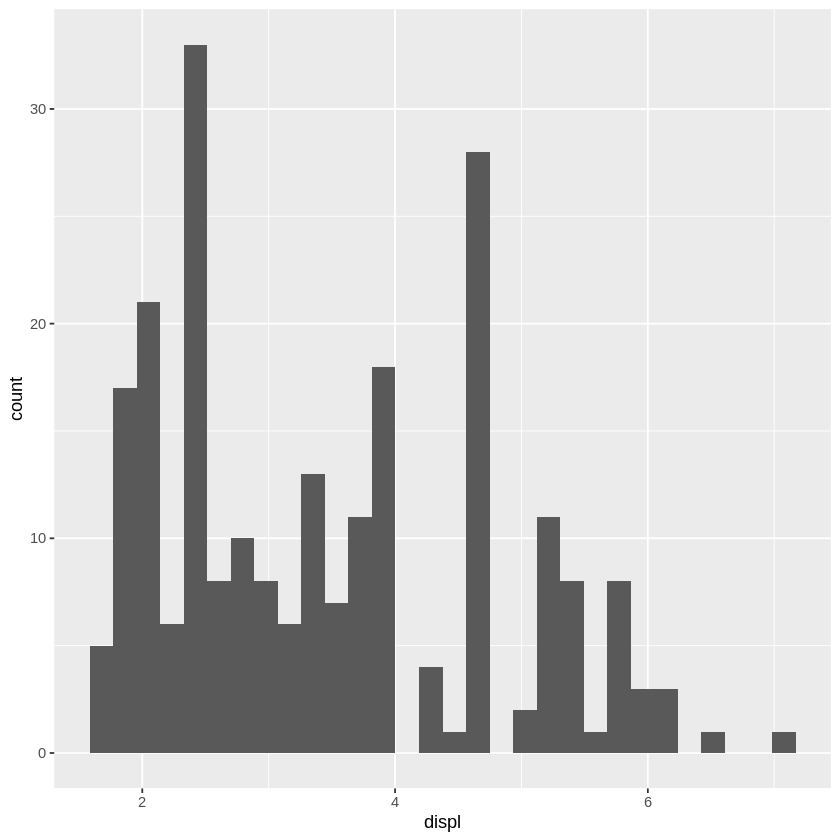

In [ ]:
ggplot(mpg, aes(displ)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



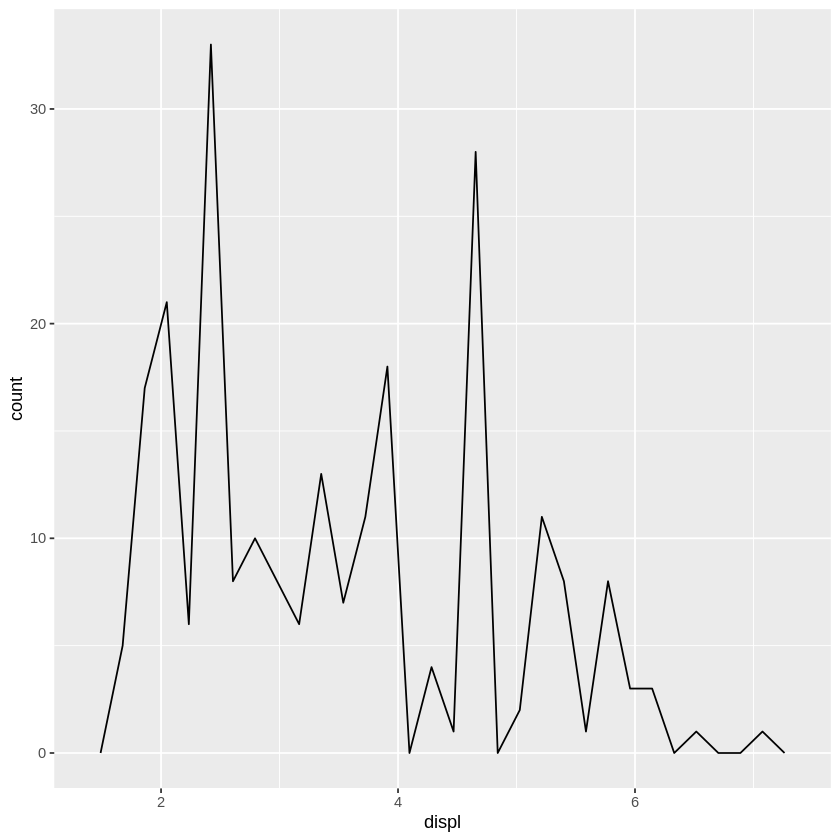

In [ ]:
ggplot(mpg, aes(displ)) + geom_freqpoly()

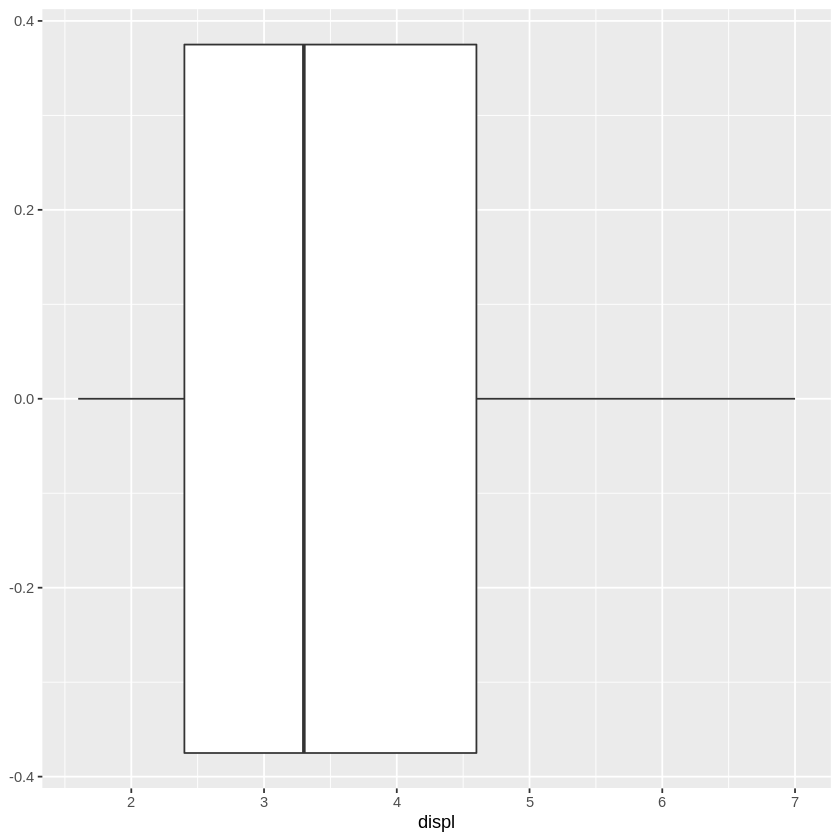

In [ ]:
ggplot(mpg, aes(displ)) + geom_boxplot()

**Analysis**
> The majority of the engine displacement of the cars represented in the MPG dataset are in the range 2.5-4.5 liters. However, there are some outliers such as 7 liters (Chevrolet Corvett - obs 28). 

> Engine displacement is the measure of the cylinder volume swept by all of the pistons in an engine. It is a known factor in power and fuel efficiency. 

> Therefore, it may have an large effect on variables such as cty and hwy

Validation Table for Displacement Variable:

summary() prefered over table() in this case because of wide range of unique displ values.

In [ ]:
summary(mpg$displ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.600   2.400   3.300   3.472   4.600   7.000 

# Cylinders

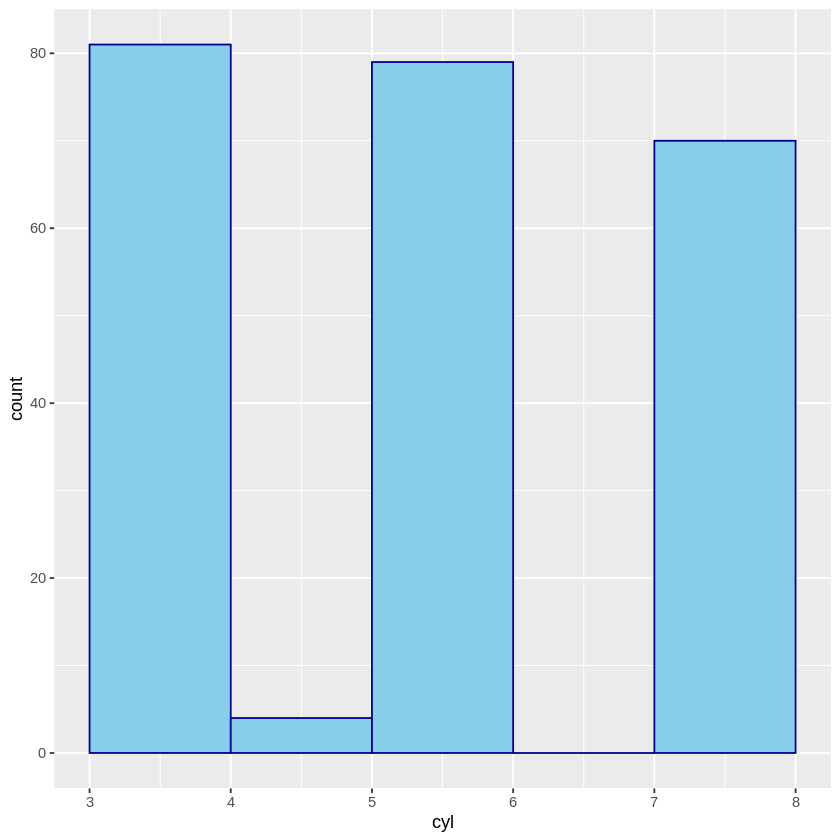

In [ ]:
ggplot(mpg, aes(cyl)) + geom_histogram(breaks = c(3, 4,5,6,7,8), fill="skyblue", color="darkblue")

**Analysis**
> The number of cylinders are almost equally divided between 3 types (4, 6, 8). There are also a few 5-cylinder cars in the dataset.

> Given that cylinders is often representational of horsepower, we can expect a broad but even variety of horsepowers.

Validation Table for Cylinder Variable:

In [ ]:
unique(mpg$cyl)
table(mpg$cyl)

[1] 4 6 8 5


 4  5  6  8 
81  4 79 70 

# Wheel Drive Types 

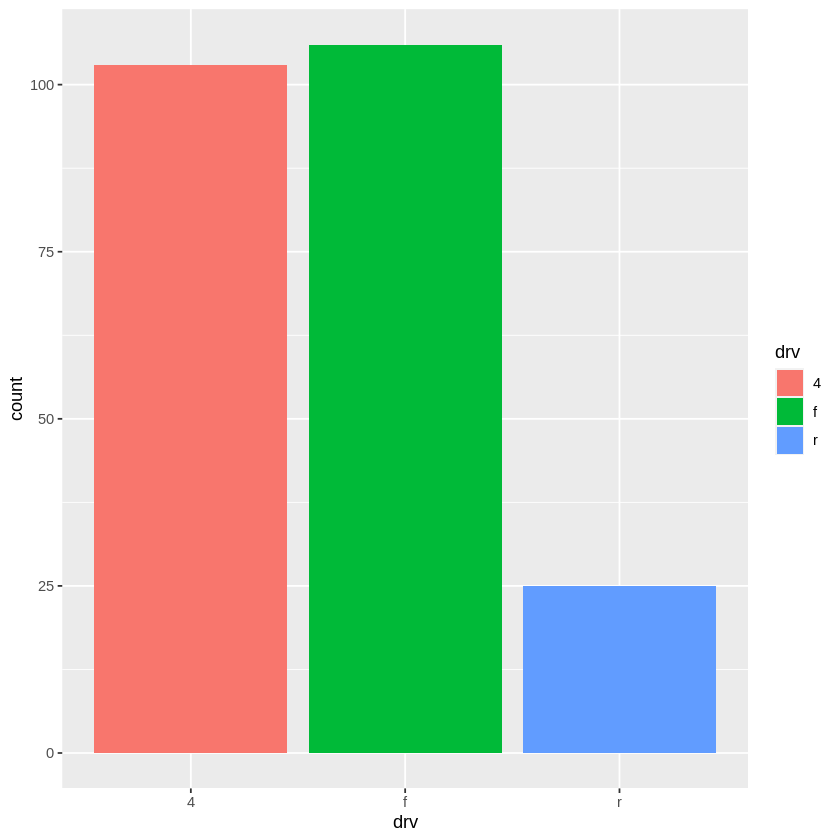

In [ ]:
ggplot(mpg, aes(drv, fill=drv)) + geom_bar()

**Analysis**
> The majority of vehicles in the dataset have either 4wd or front-wheel drive types. 

Validation Table for Drive Train Variable:

In [ ]:
table(mpg$drv)


  4   f   r 
103 106  25 

# Fuel Types

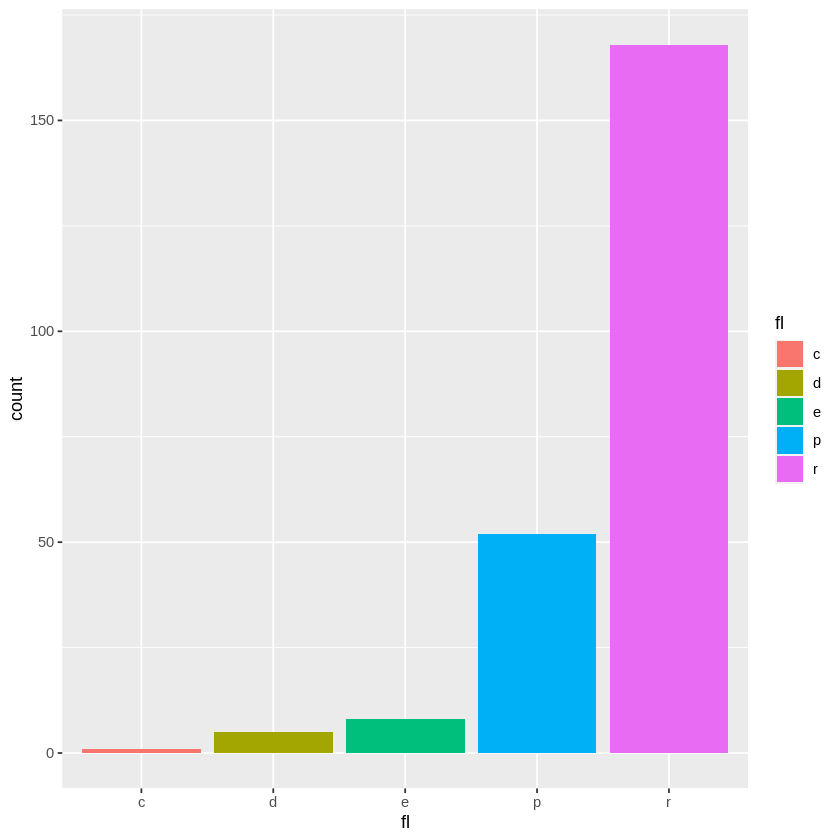

In [ ]:
ggplot(mpg, aes(fl, fill=fl)) + geom_bar()

**Analysis**
> r is the common fuel type in the dataset. c is the least common. 
> Note: fuel type counts increase alphabetically 

Validation Table for Fuel Type Variable:

In [ ]:
table(mpg$fl)


  c   d   e   p   r 
  1   5   8  52 168 

# Vehicle Class

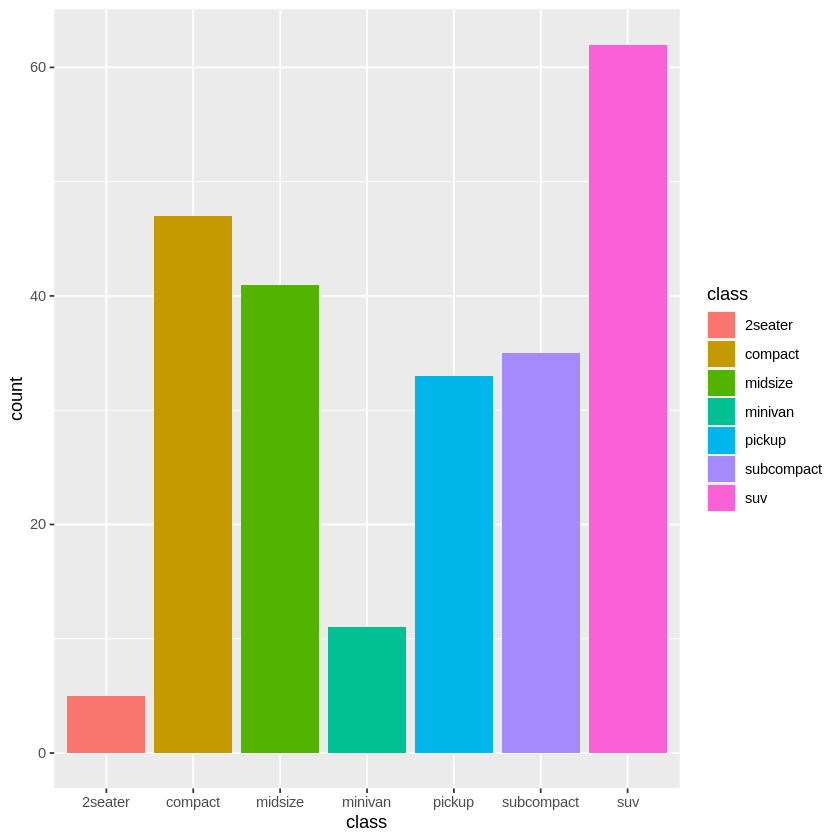

In [ ]:
ggplot(mpg, aes(class, fill=class)) + geom_bar()

**Analysis**
> The classes of cars are mostly evenly distributed.

> SUVs are the most represted while 2seaters are the least.

Validation Table for Cylinder Variable:

In [ ]:
table(mpg$class)


   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

# **Visualization of relationships between two variables through scatterplots**

# Displacement/Class vs Gas Efficiency

Efficiency Calculated Using Highway Miles Per Gallon

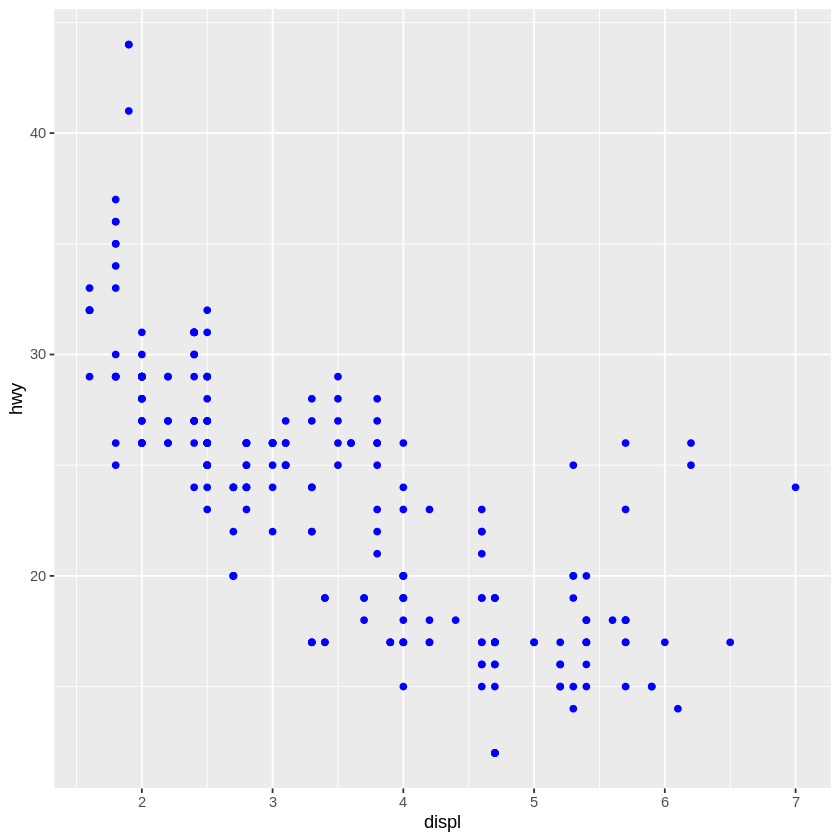

In [ ]:
ggplot(mpg, aes(displ, hwy)) + geom_point(color="blue")

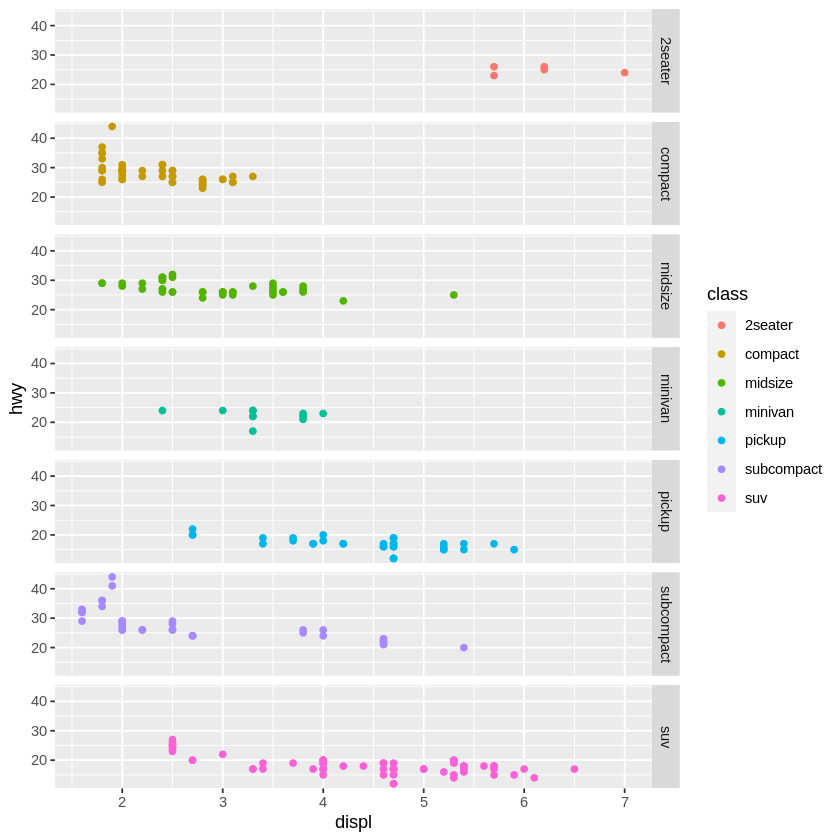

In [ ]:
ggplot(mpg, aes(displ, hwy, color=class))+geom_point() + facet_grid(class~.)

Efficiency Calculated Using City Miles Per Gallon

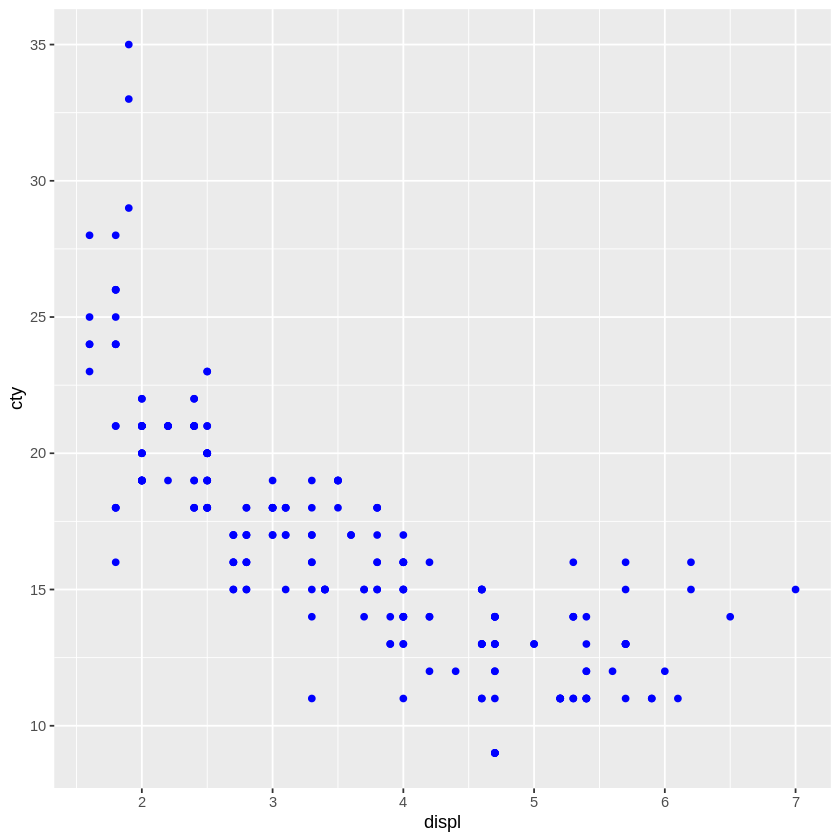

In [ ]:
ggplot(mpg, aes(displ, cty)) + geom_point(color="blue")

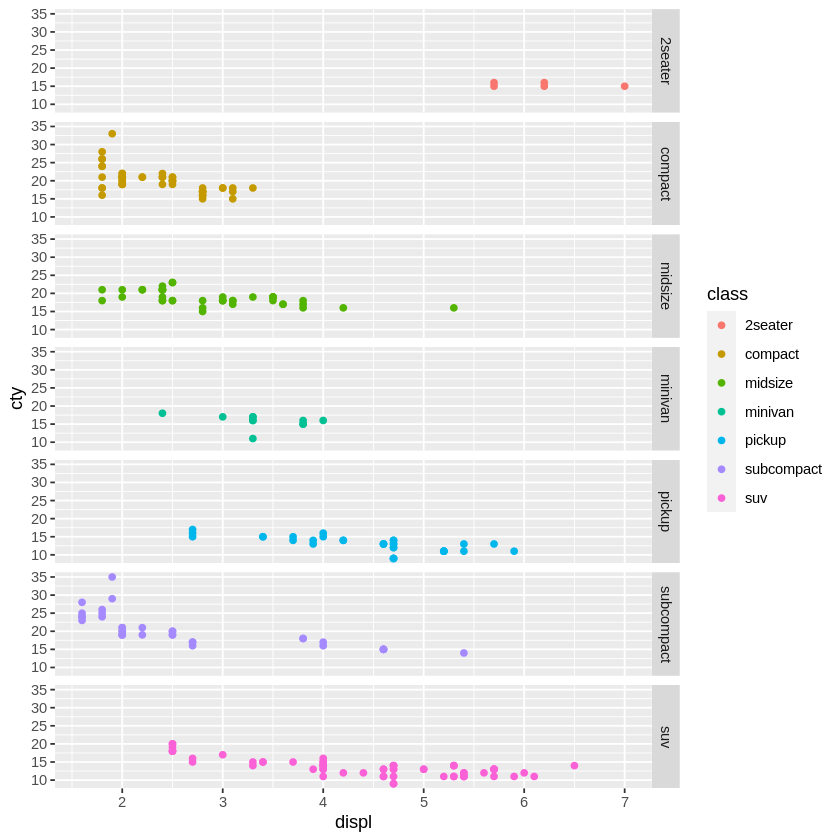

In [ ]:
ggplot(mpg, aes(displ, cty, color=class))+geom_point() + facet_grid(class~.)

> Efficiency (using both hwy and cty methods) appears to increase inversely with engine displacement.

> Subcompact cars have the highest average efficiency while pickup trucks have the lowest. 

> Using cty vs hwy does not largely change the analysis of the graphs.


In [ ]:
subcompactMean = mpg[mpg$class=="subcompact",]
subM = as.integer(mean(subcompactMean$hwy))
paste('Mean Highway MPG for Subcompact Cars: ' , subM)

pickupMean = mpg[mpg$class=="pickup",]
picM = as.integer(mean(pickupMean$hwy))
paste('Mean Highway MPG for Pickup Cars: ' , picM)

[1] "Mean Highway MPG for Subcompact Cars:  28"

[1] "Mean Highway MPG for Pickup Cars:  16"

Using Facets of Cylinder and Drive Train


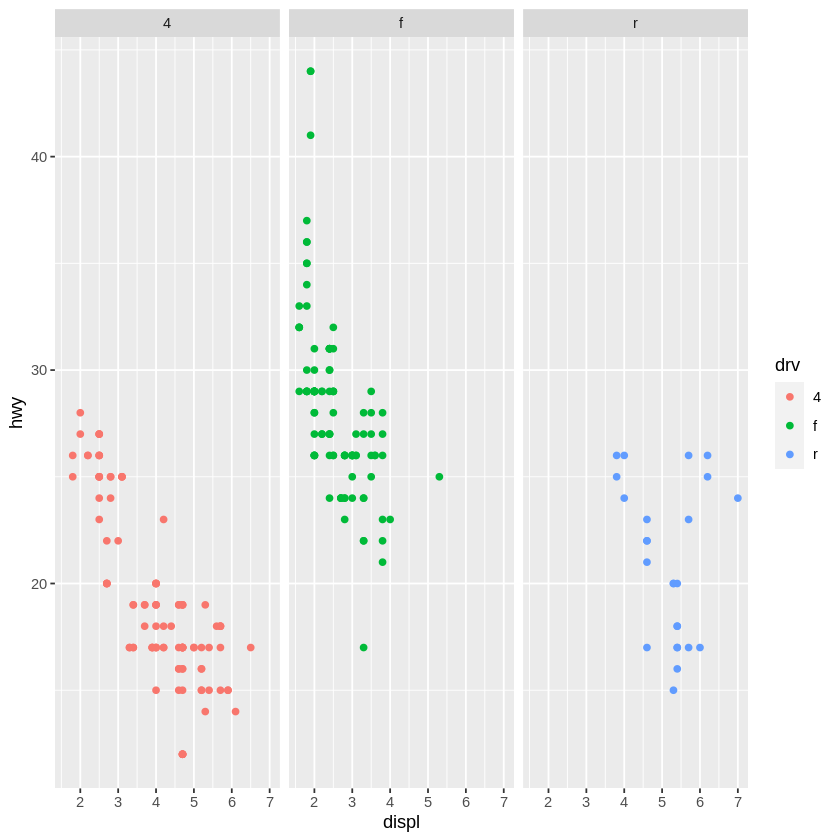

In [ ]:
ggplot(mpg, aes(displ, hwy, color = drv)) + geom_point() + facet_grid(.~drv)

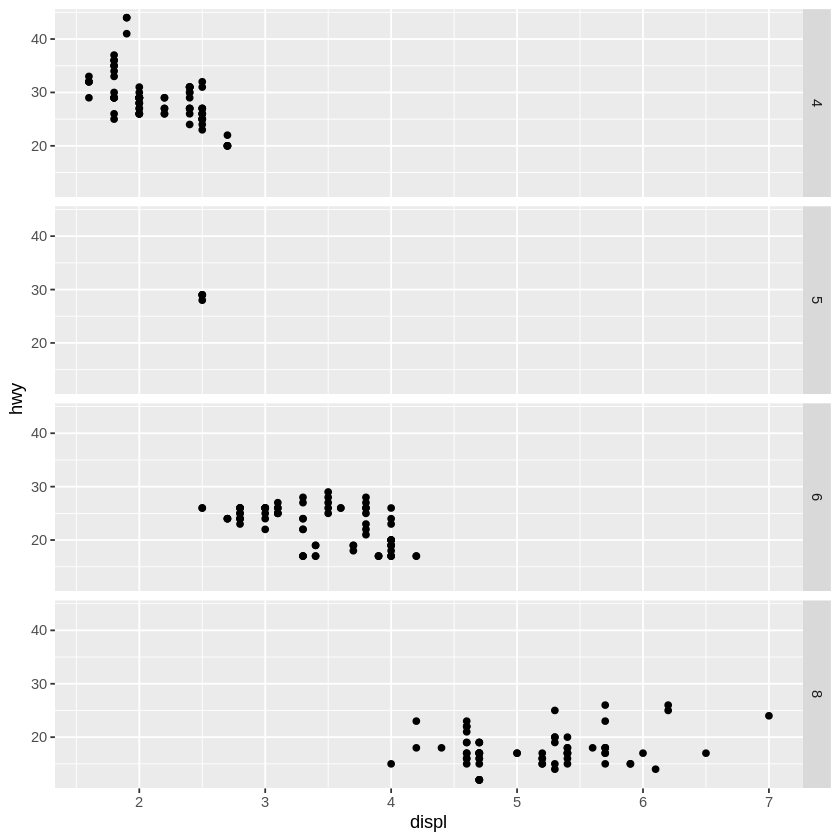

In [ ]:
ggplot(mpg, aes(displ, hwy)) + geom_point() + facet_grid(cyl~.)

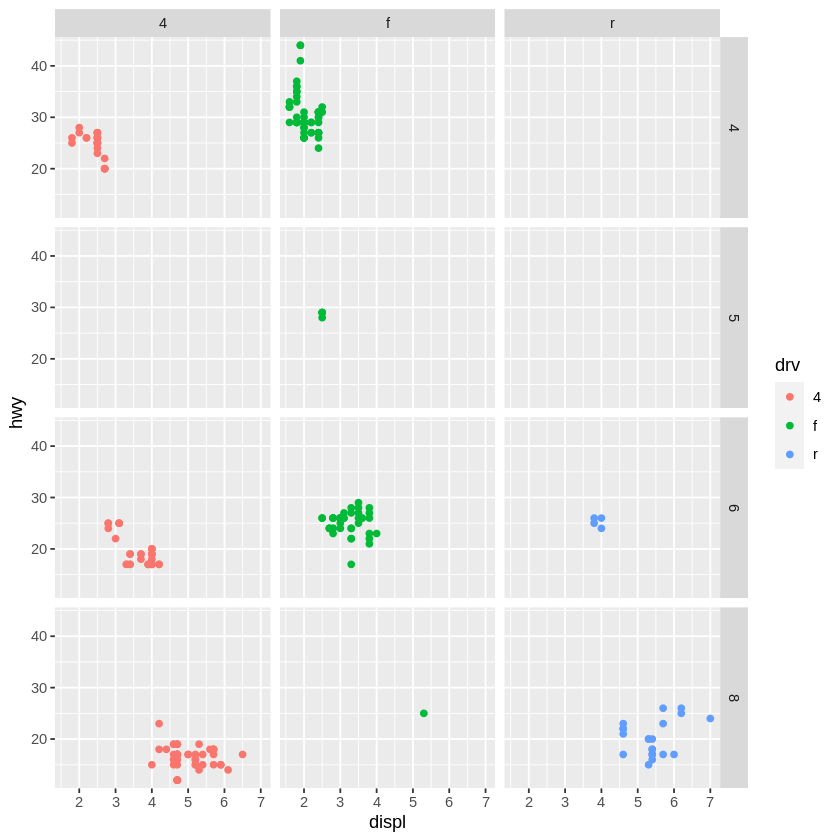

In [ ]:
ggplot(mpg, aes(displ, hwy, color = drv)) + geom_point() + facet_grid(cyl ~ drv)

> Separate curve and color for each type of drive


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



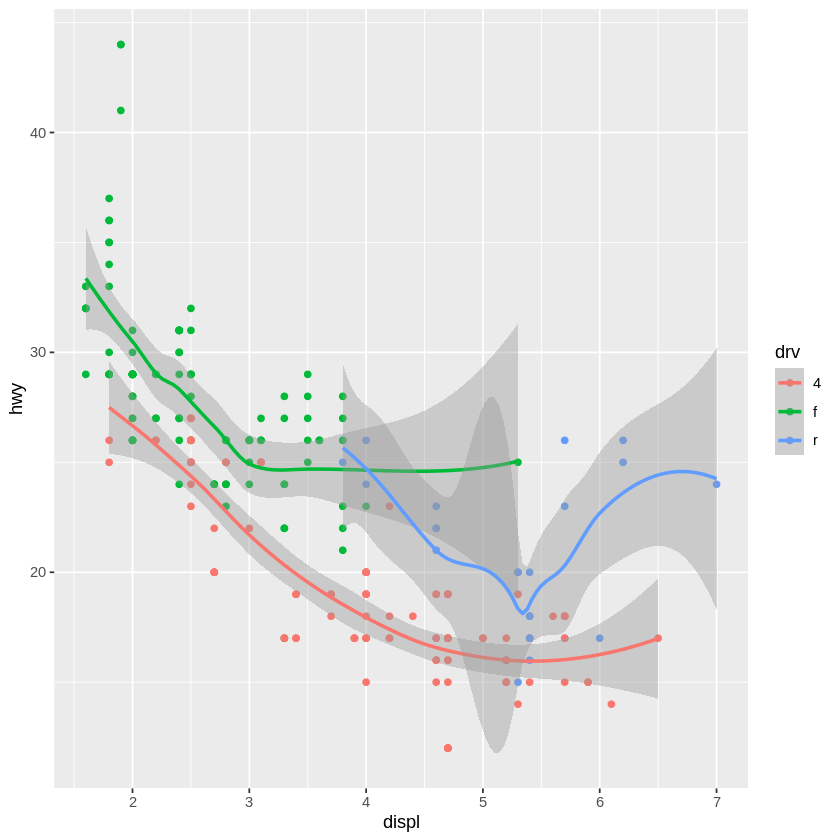

In [ ]:
ggplot(mpg, aes(displ,hwy, color = drv)) + geom_point() + geom_smooth()

> scatterplot but use the size of the points for class and drv type  - geom_count()


Warning message:
“Using size for a discrete variable is not advised.”


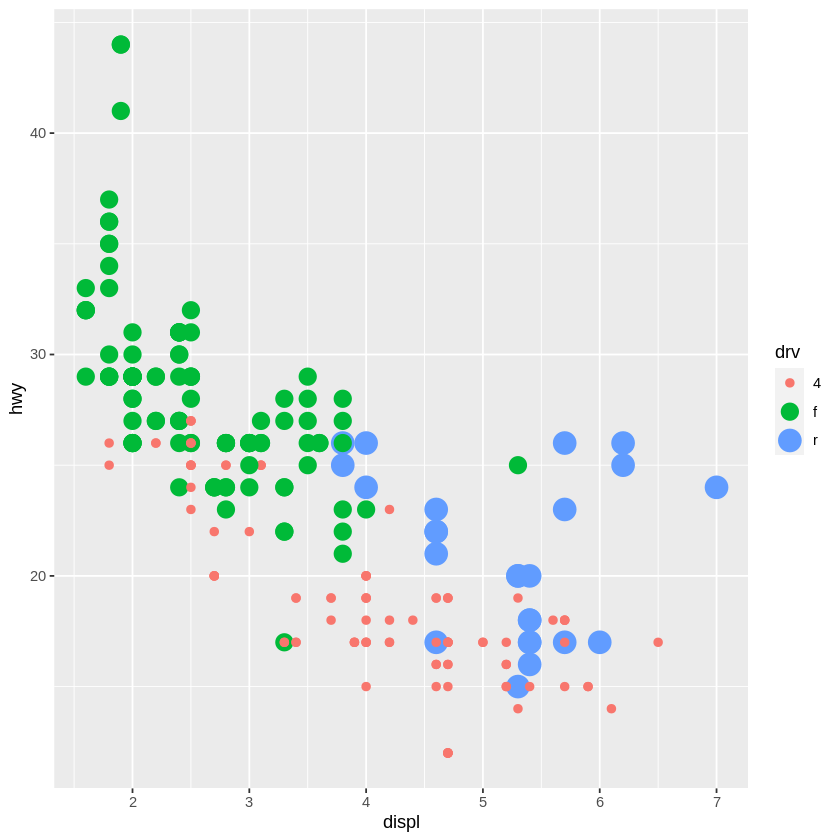

In [ ]:
ggplot(mpg, aes(displ, hwy, color = drv, size=drv)) + geom_point()

Warning message:
“Using size for a discrete variable is not advised.”


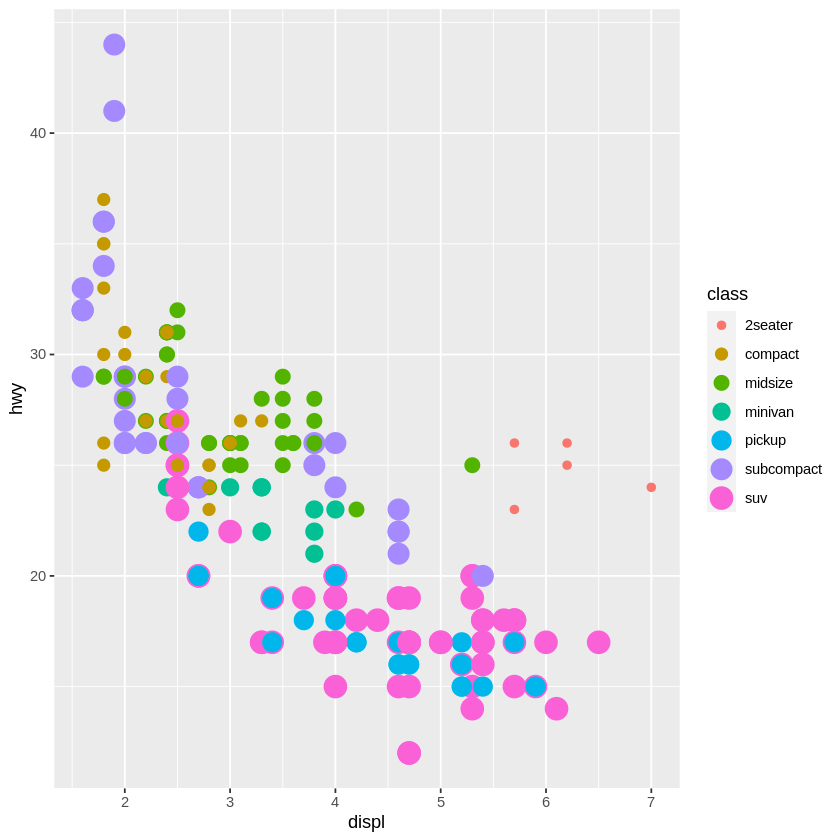

In [ ]:
ggplot(mpg, aes(displ, hwy, color = class, size=class)) + geom_point()

> Relationship between city and highway miles per gallon for cars. Color mapped for only SUVs. 


Warning message:
“Use of `mpg$class` is discouraged. Use `class` instead.”


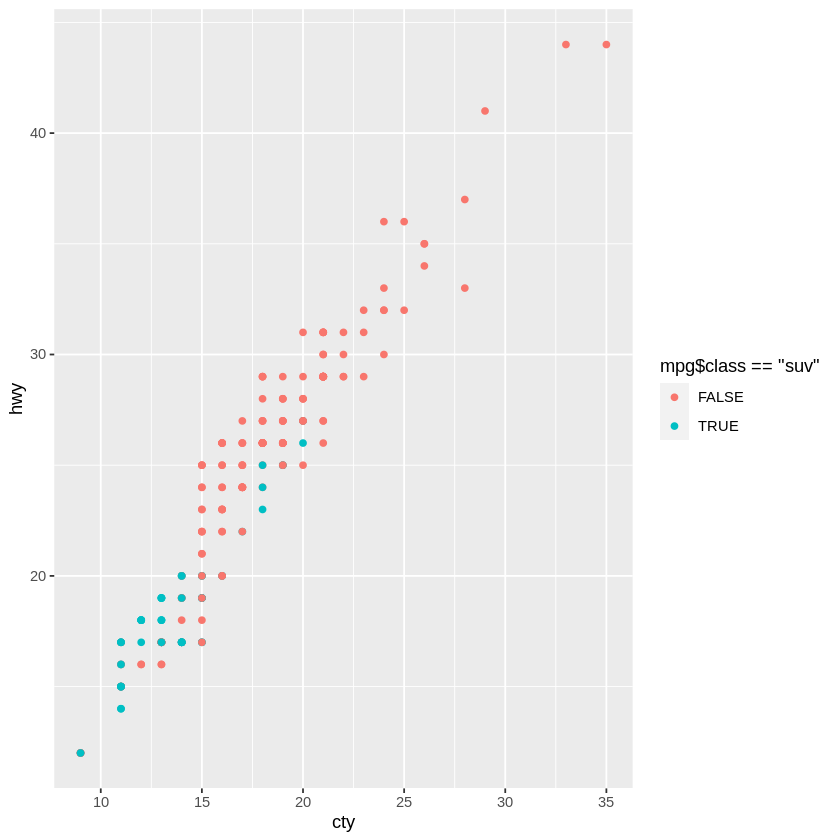

In [ ]:
ggplot(mpg, aes(cty, hwy, color = mpg$class=="suv")) + geom_point()

> Smooth curve for the relationship between displacement and highway mileage:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



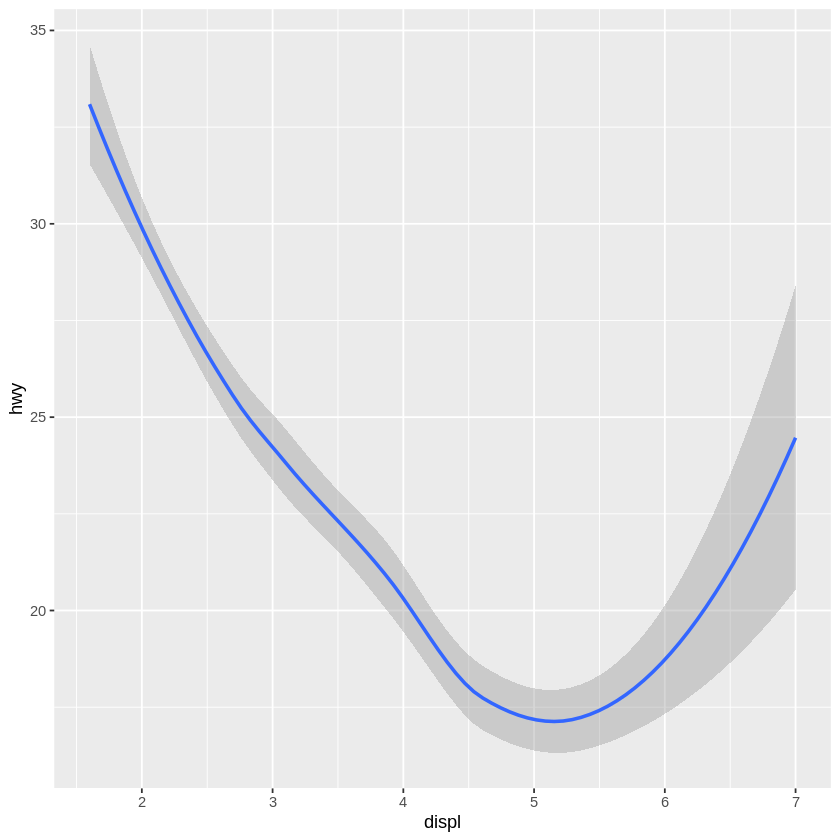

In [ ]:
ggplot(mpg, aes(displ, hwy)) + geom_smooth()

# **Correlation Plot and Matrix for MPG Variables:**

Note: corrplot doesn't work in Google Colab


In [ ]:
mpg$class = as.numeric(mpg$class)
mpg$trans = as.numeric(mpg$trans)
mpg$drv = as.numeric(mpg$drv)
mpg$fl = as.numeric(mpg$fl)
mpg$model = as.numeric(mpg$model)
mpg$manufacturer = as.numeric(mpg$manufacturer) 

# cor(mpg)

[Corr Matrix](https://drive.google.com/file/d/1Xzs4C-lY7Am5LoJF5l-tnadvDIkqEcQe/view?usp=sharing)

In [ ]:
# cor_train = cor(mpg)
# corrplot(cor_train, method="pie", type="lower")

[Corr Plot](https://drive.google.com/file/d/1pBl3HO2sD8wM8pYb1l0NiuX_wKn3RHnQ/view?usp=sharing)

> Correlation between cty and hwy miles (positive)

In [ ]:
cor(mpg$cty, mpg$hwy)

[1] 0.9559159

> Correlation between displ and cyl

In [ ]:
cor(mpg$displ, mpg$cyl) (positive)

[1] 0.9302271

> Correlation between cty and displ/cyl (negative)

In [ ]:
cor(mpg$cty, mpg$displ)
cor(mpg$cty, mpg$cyl)

[1] -0.798524

[1] -0.8057714

Correlation between fl and drv (zero correlation)

In [ ]:
# cor(mpg$fl, mpg$drv)

-0.06028152

[1] -0.06028152

# **Final Observations** 

> Efficiency is very correlated with engine displacement and number of cylinders. Both are VERY correlated with eachother which makes sense given engine displacement is measured by the cylinder volume swept by all the pistons. 

> Cty and Hwy are also very correlated because they are both measures of fuel efficiency. 

> However, there seems to be very little correlation among the other variables represented in the MPG dataset. 
